In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
data = pd.read_csv("/Users/sivanr/PycharmProjects/eCommerce/ml-100k/u1.base", delimiter='\t', names=r_cols)
r_data = data.groupby('movie_id')['rating'].mean().reset_index(name='rating')
round_r_data = r_data.astype(int)


In [3]:
i_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
          'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children',
          'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
          'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
data_i = pd.read_csv('/Users/sivanr/PycharmProjects/eCommerce/ml-100k/u.item', delimiter='|', names=i_cols, encoding='latin-1')
movies_rating = data_i.merge(r_data, on='movie_id', how='inner')
movies_avg_rating = movies_rating.filter(['movie_id', 'movie_title', 'user_id', 'rating'])
movies_avg_rating = movies_avg_rating.sort_values(by='rating', ascending=False)
print("highest rating movies: ")
print(movies_avg_rating.head(3)['movie_title'])


highest rating movies: 
1181                                   Prefontaine (1997)
1620    Entertaining Angels: The Dorothy Day Story (1996)
1566                        Someone Else's America (1995)
Name: movie_title, dtype: object


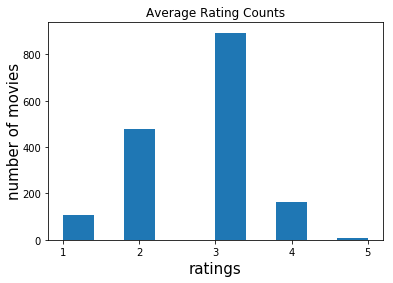

In [4]:
plt.hist([round_r_data['rating']])
plt.xlabel("ratings", fontsize=15)
plt.xticks(range(1, 6))
plt.ylabel("number of movies", fontsize=15, labelpad=0)
plt.title("Average Rating Counts")
plt.show()


In [5]:
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
data_u = pd.read_csv('/Users/sivanr/PycharmProjects/eCommerce/ml-100k/u.user', delimiter='|', names=u_cols)
users_ratings = data.merge(data_u, on='user_id', how='inner')

males = users_ratings.loc[users_ratings['gender'] == 'M']
females = users_ratings.loc[users_ratings['gender'] == 'F']

female_rating = females.groupby(['movie_id'])['rating'].mean().reset_index(name='rating')
round_female_data = female_rating.astype(int)

male_rating = males.groupby(['movie_id'])['rating'].mean().reset_index(name='rating')
round_male_data = male_rating.astype(int)


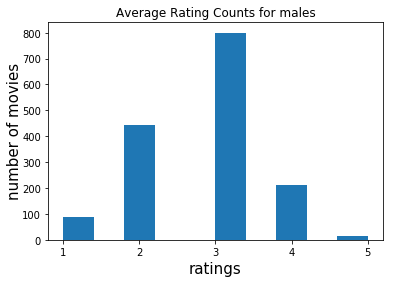

In [6]:
plt.hist([round_male_data['rating']])
plt.xlabel("ratings", fontsize=15)
plt.xticks(range(1, 6))
plt.ylabel("number of movies", fontsize=15, labelpad=0)
plt.title("Average Rating Counts for males")
plt.show()


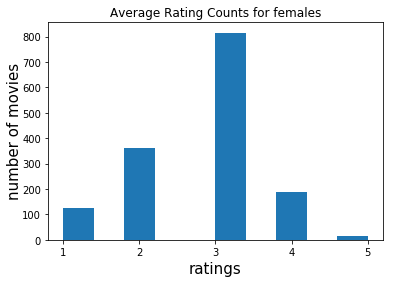

In [7]:
plt.hist([round_female_data['rating']])
plt.xlabel("ratings", fontsize=15)
plt.xticks(range(1, 6))
plt.ylabel("number of movies", fontsize=15, labelpad=0)
plt.title("Average Rating Counts for females")
plt.show()


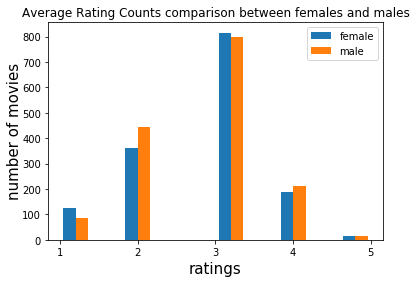

In [8]:

plt.hist([round_female_data['rating'], round_male_data['rating']])
plt.legend(['female', 'male'])
plt.xlabel("ratings", fontsize=15)
plt.xticks(range(1, 6))
plt.ylabel("number of movies", fontsize=15, labelpad=0)
plt.title("Average Rating Counts comparison between females and males")
plt.show()


As we can see males rate movies with rating - 2 and 4 more than females. females more rate 1 and 3 rating. 


In [9]:

female_movies_ratings = females.merge(data_i, on='movie_id', how='inner').filter(['movie_id', 'movie_title', 
                                                                                  'user_id', 'age', 'rating'])
female_movies_ratings = female_movies_ratings.sort_values(by='rating', ascending=False).drop_duplicates('movie_title')

print('Females highest ratings: ')
print(female_movies_ratings.head(3)['movie_title'])


Females highest ratings: 
3865                                   Men in Black (1997)
4541                          To Kill a Mockingbird (1962)
18288    Wallace & Gromit: The Best of Aardman Animatio...
Name: movie_title, dtype: object


In [10]:
male_movies_ratings = males.merge(data_i, on='movie_id', how='inner').filter(['movie_id', 'movie_title',
                                                                              'user_id', 'age', 'rating'])

male_movies_ratings = male_movies_ratings.sort_values(by='rating', ascending=False).drop_duplicates('movie_title')

print('Males highest ratings: ')
print(male_movies_ratings.head(3)['movie_title'])


Males highest ratings: 
0                Toy Story (1995)
13513    L.A. Confidential (1997)
36867    Full Metal Jacket (1987)
Name: movie_title, dtype: object


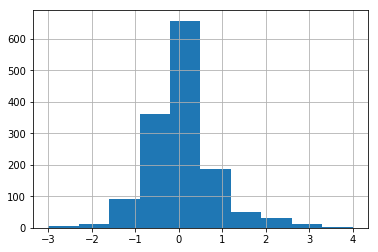

In [11]:
avg_ratings = male_rating.merge(female_rating, on="movie_id", how="inner", suffixes=("_male", "_female"))


avg_ratings["difference"] = avg_ratings["rating_male"] - avg_ratings["rating_female"]

difference_ratings = avg_ratings["difference"].dropna()
difference_ratings.hist()


As we can see most of the movies were rated the same

In [12]:
avg_ratings_sorted_by_difference = avg_ratings.merge(data_i, on="movie_id", how="inner").sort_values(by="difference")
print("3 movies females rated higher than males: ")
print(avg_ratings_sorted_by_difference.head(3)['movie_title'])

3 movies females rated higher than males: 
1338    Visitors, The (Visiteurs, Les) (1993)
819              In the Line of Duty 2 (1987)
1409                       Rough Magic (1995)
Name: movie_title, dtype: object


In [13]:
print("3 movies males rated higher than females: ")
print(avg_ratings_sorted_by_difference.tail(3)['movie_title'])

3 movies males rated higher than females: 
1315                           Sliding Doors (1998)
830     Two or Three Things I Know About Her (1966)
1131                               Hugo Pool (1997)
Name: movie_title, dtype: object


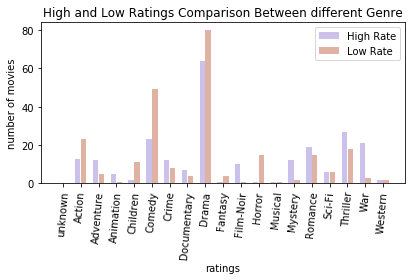

{'unknown': 0, 'Action': 13, 'Adventure': 12, 'Animation': 5, 'Children': 2, 'Comedy': 23, 'Crime': 12, 'Documentary': 7, 'Drama': 64, 'Fantasy': 1, 'Film-Noir': 10, 'Horror': 1, 'Musical': 1, 'Mystery': 12, 'Romance': 19, 'Sci-Fi': 6, 'Thriller': 27, 'War': 21, 'Western': 2}
{'unknown': 0, 'Action': 23, 'Adventure': 5, 'Animation': 1, 'Children': 11, 'Comedy': 49, 'Crime': 8, 'Documentary': 4, 'Drama': 80, 'Fantasy': 4, 'Film-Noir': 1, 'Horror': 15, 'Musical': 1, 'Mystery': 2, 'Romance': 15, 'Sci-Fi': 6, 'Thriller': 18, 'War': 3, 'Western': 2}


In [14]:
movies_high_rating = movies_rating.loc[movies_rating['rating'] > 4.0]
movies_low_rating = movies_rating.loc[movies_rating['rating'] <= 2.0]

genres = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 
          'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
          'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

genre_high_counts = {}
genre_low_counts = {}

for genre in genres:
    genre_high_counts[genre] = movies_high_rating[movies_high_rating[genre] == 1].shape[0]
    genre_low_counts[genre] = movies_low_rating[movies_low_rating[genre] == 1].shape[0]

fig, ax = plt.subplots()
index = np.arange(0, 3*len(genres), 3)
ax.bar(np.arange(0, 3*len(genres), 3), [genre_high_counts[genre] for genre in genres], color=(0.5, 0.4, 0.8, 0.4), 
       width=0.9, label='High Rate')
ax.bar(np.arange(1, 3*len(genres)+1, 3), [genre_low_counts[genre] for genre in genres], color=(0.8, 0.5, 0.4, 0.6), 
       width=0.9, label='Low Rate')

ax.set_xlabel("ratings")
ax.set_ylabel('number of movies')
ax.set_title('High and Low Ratings Comparison Between different Genre')
ax.set_xticks(index+0.5)
ax.set_xticklabels(genres, rotation=85)
ax.legend()
fig.tight_layout()
plt.show()

print(genre_high_counts)
print(genre_low_counts)


As we can see 'Drama' is most rated both low ratings and high ratings but more low ratings. 
'Comedy' movies are rated more with low rating than with high rating. 
'war' movies are rated more with high rating than with low rating. 

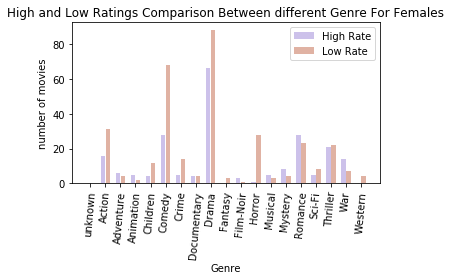

{'unknown': 0, 'Action': 16, 'Adventure': 6, 'Animation': 5, 'Children': 4, 'Comedy': 28, 'Crime': 5, 'Documentary': 4, 'Drama': 66, 'Fantasy': 0, 'Film-Noir': 3, 'Horror': 1, 'Musical': 5, 'Mystery': 8, 'Romance': 28, 'Sci-Fi': 5, 'Thriller': 21, 'War': 14, 'Western': 0}
{'unknown': 0, 'Action': 31, 'Adventure': 4, 'Animation': 2, 'Children': 12, 'Comedy': 68, 'Crime': 14, 'Documentary': 4, 'Drama': 88, 'Fantasy': 3, 'Film-Noir': 1, 'Horror': 28, 'Musical': 3, 'Mystery': 4, 'Romance': 23, 'Sci-Fi': 8, 'Thriller': 22, 'War': 7, 'Western': 4}


In [16]:
movies_rating_females = female_rating.merge(data_i, on='movie_id', how='inner')

movies_high_rating_female = movies_rating_females.loc[movies_rating_females['rating'] > 4.0]
movies_low_rating_female = movies_rating_females.loc[movies_rating_females['rating'] <= 2.0]


genre_high_counts_female = {}
genre_low_counts_female = {}

for genre in genres:
    genre_high_counts_female[genre] = movies_high_rating_female[movies_high_rating_female[genre] == 1].shape[0]
    genre_low_counts_female[genre] = movies_low_rating_female[movies_low_rating_female[genre] == 1].shape[0]

fig, ax = plt.subplots()
index = np.arange(0, 3*len(genres), 3)
ax.bar(np.arange(0, 3*len(genres), 3), [genre_high_counts_female[genre] for genre in genres], color=(0.5, 0.4, 0.8, 0.4),
       width=0.9, label='High Rate')
ax.bar(np.arange(1, 3*len(genres)+1, 3), [genre_low_counts_female[genre] for genre in genres], color=(0.8, 0.5, 0.4, 0.6),
       width=0.9, label='Low Rate')

ax.set_xlabel("Genre")
ax.set_ylabel('number of movies')
ax.set_title('High and Low Ratings Comparison Between different Genre For Females')
ax.set_xticks(index+0.5)
ax.set_xticklabels(genres, rotation=85)
ax.legend()
fig.tight_layout()
plt.show()

print(genre_high_counts_female)
print(genre_low_counts_female)


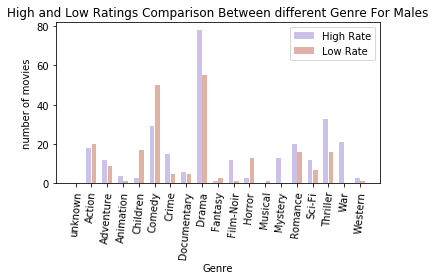

{'unknown': 0, 'Action': 18, 'Adventure': 12, 'Animation': 4, 'Children': 3, 'Comedy': 29, 'Crime': 15, 'Documentary': 6, 'Drama': 78, 'Fantasy': 1, 'Film-Noir': 12, 'Horror': 3, 'Musical': 0, 'Mystery': 13, 'Romance': 20, 'Sci-Fi': 12, 'Thriller': 33, 'War': 21, 'Western': 3}
{'unknown': 0, 'Action': 20, 'Adventure': 9, 'Animation': 1, 'Children': 17, 'Comedy': 50, 'Crime': 5, 'Documentary': 5, 'Drama': 55, 'Fantasy': 3, 'Film-Noir': 1, 'Horror': 13, 'Musical': 1, 'Mystery': 0, 'Romance': 16, 'Sci-Fi': 7, 'Thriller': 16, 'War': 0, 'Western': 1}


In [17]:
movies_rating_males = male_rating.merge(data_i, on='movie_id', how='inner')

movies_high_rating_male = movies_rating_males.loc[movies_rating_males['rating'] > 4.0]
movies_low_rating_male = movies_rating_males.loc[movies_rating_males['rating'] <= 2.0]


genre_high_counts_male = {}
genre_low_counts_male = {}

for genre in genres:
    genre_high_counts_male[genre] = movies_high_rating_male[movies_high_rating_male[genre] == 1].shape[0]
    genre_low_counts_male[genre] = movies_low_rating_male[movies_low_rating_male[genre] == 1].shape[0]

fig, ax = plt.subplots()
index = np.arange(0, 3*len(genres), 3)
ax.bar(np.arange(0, 3*len(genres), 3), [genre_high_counts_male[genre] for genre in genres], color=(0.5, 0.4, 0.8, 0.4),
       width=0.9, label='High Rate')
ax.bar(np.arange(1, 3*len(genres)+1, 3), [genre_low_counts_male[genre] for genre in genres], color=(0.8, 0.5, 0.4, 0.6),
       width=0.9, label='Low Rate')

ax.set_xlabel("Genre")
ax.set_ylabel('number of movies')
ax.set_title('High and Low Ratings Comparison Between different Genre For Males')
ax.set_xticks(index+0.5)
ax.set_xticklabels(genres, rotation=85)
ax.legend()
fig.tight_layout()
plt.show()

print(genre_high_counts_male)
print(genre_low_counts_male)


In [18]:
print(r_data)

      movie_id    rating
0            1  3.892950
1            2  3.180952
2            3  3.000000
3            4  3.526316
4            5  3.304348
5            6  3.400000
6            7  3.798046
7            8  3.994220
8            9  3.833333
9           10  3.876712
10          11  3.851282
11          12  4.398104
12          13  3.410448
13          14  3.900000
14          15  3.795745
15          16  3.290323
16          17  3.180556
17          18  2.857143
18          19  3.983051
19          20  3.471698
20          21  2.838235
21          22  4.134783
22          23  4.076433
23          24  3.397059
24          25  3.450216
25          26  3.403509
26          27  3.180000
27          28  3.905405
28          29  2.684211
29          30  4.066667
...        ...       ...
1620      1653  5.000000
1621      1654  1.000000
1622      1655  2.000000
1623      1656  3.500000
1624      1657  3.000000
1625      1658  3.000000
1626      1659  1.000000
1627      1660  2.000000


In [23]:
count_ratings = data.groupby('movie_id')['rating'].count().reset_index(name="count")

populars = count_ratings.merge(data_i, on='movie_id', how="inner").sort_values(by="count", ascending=False)
print(populars.head(10)['movie_title'])

49                  Star Wars (1977)
180        Return of the Jedi (1983)
257                   Contact (1997)
99                      Fargo (1996)
293                 Liar Liar (1997)
287                    Scream (1996)
285      English Patient, The (1996)
0                   Toy Story (1995)
120    Independence Day (ID4) (1996)
299             Air Force One (1997)
Name: movie_title, dtype: object
